## Setup

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('../cleaning/cleaned.csv')
raw = pd.read_csv('../cleaning/responses.csv')

## Overview


In [77]:
df[numeric_cols].describe().round(2).T.to_csv("summary.csv")

In [71]:
df.shape

(28, 47)

In [2]:
print(f"\nColumns: {len(df.columns)}")

df.head()


Columns: 47


,Major(s),Minor(s) (N/A if none),GPA,Length of Your Longest Relationship (Has to be an number of months),Number of Romantic Involvements (N/A if not applicable),"How many times a week do you go out? (e.g., going to a party, going to the mall, hanging out with friends, etc.)",Club_Professional,Club_Recreational,Club_Athletic,Club_Skill_development,...,College_Eighth,College_Marshall,College_Muir,College_Revelle,College_Seventh,College_Sixth,Race_Asian,Race_Multiracial,Race_Prefer not to specify,Race_White/Caucasian
0,General Biology,NaN,3.69,0.0,NaN,2.0,1,0,0,0,...,True,False,False,False,False,False,False,False,False,True
1,Data Science,Business Analytics,3.72,24.0,2.0,1.5,1,0,0,1,...,False,False,True,False,False,False,True,False,False,False
2,Math and Economics,Finance And Environmental Science,3.70,10.0,2.0,4.5,1,0,0,0,...,False,False,False,False,True,False,False,True,False,False
3,Math and Economics,NaN,4.00,4.0,1.0,2.0,1,1,0,0,...,False,True,False,False,False,False,False,False,False,True
4,Cognitive Science,NaN,NaN,8.0,2.0,2.5,1,0,1,0,...,False,False,False,True,False,False,True,False,False,False


## Numeric statistics


In [64]:
df[numeric_cols].corr().to_csv("corrs.csv")

In [59]:
numeric_cols = ['GPA', 'Length of Your Longest Relationship (Has to be an number of months)', 
                'Number of Romantic Involvements (N/A if not applicable)',
                'How many times a week do you go out? (e.g., going to a party, going to the mall, hanging out with friends, etc.)']
df[numeric_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
GPA,27.0,3.579630,0.769538,0.0,3.655,3.8,3.88,4.0
Length of Your Longest Relationship (Has to be an number of months),24.0,20.500000,20.870199,0.0,7.500,17.5,27.00,96.0
Number of Romantic Involvements (N/A if not applicable),22.0,2.090909,1.997834,0.0,1.000,2.0,2.00,10.0
"How many times a week do you go out? (e.g., going to a party, going to the mall, hanging out with friends, etc.)",28.0,2.535714,1.346660,1.0,1.500,2.5,3.00,7.0


## Major distribution


In [6]:
df['Major(s)'].value_counts()

Major(s)
Data Science                                                    5
Computer Science                                                3
Business Economics                                              2
Math and Economics                                              2
Psychology                                                      2
General Biology                                                 1
Neurobiology                                                    1
Molecular and Cell Biology                                      1
Business Economics, International Studies, Political Science    1
Theater                                                         1
Bioengineering Bioinformatics                                   1
Cognitive Science Design                                        1
Geoscience                                                      1
Literatures in English                                          1
Clinical Psychology                                             1
M

## Minor distribution

In [7]:
df['Minor(s) (N/A if none)'].value_counts()


Minor(s) (N/A if none)
Business Analytics                   3
Finance And Environmental Science    1
Astrophysics                         1
Marine Science                       1
Biology                              1
Mathematics                          1
Cognitive Science                    1
Cognitive Science Philosophy         1
Marketing                            1
Bioethics                            1
Finance                              1
Name: count, dtype: int64

## Club distribution

In [8]:
club_cols = [col for col in df.columns if col.startswith('Club_')]
df[club_cols].sum().sort_values(ascending=False)

Club_Professional         18
Club_Recreational         10
Club_Skill_development     5
Club_Athletic              3
Club_Cultural              3
Club_None                  3
Club_Student_council       1
dtype: int64

## Binary variables

In [9]:
binary_cols = ['Play_Sports', 'Greek_Life', 'Commute', 'Transfer', 'Hispanic_Latino', 
               'Met_Partner_UCSD', 'Long_Distance']
df[binary_cols].sum().sort_values(ascending=False)

Play_Sports         9
Commute             7
Long_Distance       5
Greek_Life          4
Transfer            4
Hispanic_Latino     4
Met_Partner_UCSD    4
dtype: int64

## Relationship status distribution

In [10]:
relationship_cols = [col for col in df.columns if col.startswith('Relationship_Status_')]
df[relationship_cols].sum().sort_values(ascending=False)

Relationship_Status_Single               18
Relationship_Status_In a relationship    10
dtype: int64

## Year distribution

In [11]:
year_cols = [col for col in df.columns if col.startswith('Year_')]
df[year_cols].sum().sort_values(ascending=False)

Year_Third-year     15
Year_First-year      5
Year_Fourth-year     5
Year_Second-year     3
dtype: int64

## College distribution

In [12]:
college_cols = [col for col in df.columns if col.startswith('College_')]
df[college_cols].sum().sort_values(ascending=False)


College_Eighth      6
College_Muir        5
College_Revelle     5
College_Marshall    4
College_Seventh     4
College_Sixth       4
dtype: int64

# Demographic distribution

In [13]:
race_cols = [col for col in df.columns if col.startswith('Race_')]
df[race_cols].sum().sort_values(ascending=False)

Race_Asian                    18
Race_White/Caucasian           6
Race_Multiracial               3
Race_Prefer not to specify     1
dtype: int64

In [14]:
gender_cols = [col for col in df.columns if col.startswith('Gender_')]
df[gender_cols].sum().sort_values(ascending=False)

Gender_Female                   19
Gender_Male                      8
Gender_Prefer not to specify     1
dtype: int64

In [15]:
sexuality_cols = [col for col in df.columns if col.startswith('Sexuality_')]
df[sexuality_cols].sum().sort_values(ascending=False)

Sexuality_Heterosexual/Straight    20
Sexuality_Bisexual                  4
Sexuality_Prefer not to specify     2
Sexuality_Asexual                   1
Sexuality_Homosexual/Gay            1
dtype: int64

In [16]:
job_cols = [col for col in df.columns if col.startswith('Job_Status_')]
df[job_cols].sum().sort_values(ascending=False)

Job_Status_Part-Time     14
Job_Status_Unemployed    13
Job_Status_Employed       1
dtype: int64

# Visualizations

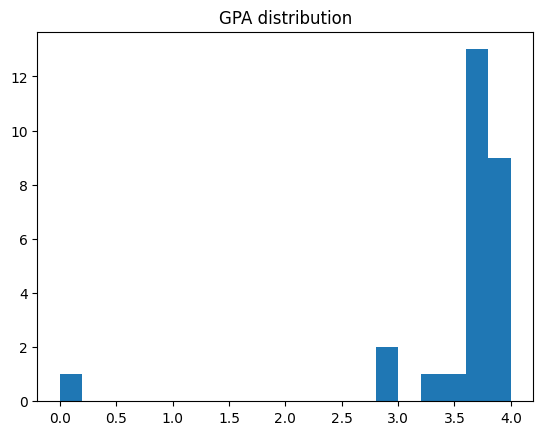

In [20]:
plt.hist(df['GPA'], bins=20)
plt.title('GPA distribution')
plt.show()

In [ ]:
major_counts = df['Major(s)'].value_counts().head(5)
fig = px.bar(x=major_counts.index, y=major_counts.values, title='Top 5 majors')
fig.update_layout(xaxis_title='Major', yaxis_title='Count', xaxis_tickangle=-45)
fig.show()


In [ ]:
year_counts = df[year_cols].sum()
fig = px.bar(x=year_counts.index, y=year_counts.values, title='Year distribution')
fig.update_layout(xaxis_title='Year', yaxis_title='Count', xaxis_tickangle=-45)
fig.show()


In [ ]:
college_counts = df[college_cols].sum()
fig = px.bar(x=college_counts.index, y=college_counts.values, title='College distribution')
fig.update_layout(xaxis_title='College', yaxis_title='Count', xaxis_tickangle=-45)
fig.show()


In [ ]:
club_counts = df[club_cols].sum().sort_values(ascending=False)
fig = px.bar(x=club_counts.index, y=club_counts.values, title='Club participation')
fig.update_layout(xaxis_title='Club Type', yaxis_title='Count', xaxis_tickangle=-45)
fig.show()


# Missing value counts

In [ ]:
df.isnull().sum().sort_values(ascending=False).head(10)

Minor(s) (N/A if none)                                                 15
Number of Romantic Involvements (N/A if not applicable)                 6
Length of Your Longest Relationship (Has to be an number of months)     4
GPA                                                                     1
Major(s)                                                                0
Year_Third-year                                                         0
Sexuality_Homosexual/Gay                                                0
Sexuality_Prefer not to specify                                         0
Gender_Female                                                           0
Gender_Male                                                             0
dtype: int64